In [3]:
import pandas as pd

In [4]:
df3 = pd.read_csv('Data_Cleaned.csv')

In [190]:
df3.head(3)

,Unnamed: 0,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,0,4,5,1927,12.0,88434,0,88434,65.0,78.9,80.3,173.5,175.1,6981428.0,2023032.0,12724.0,1272388.0,249.43,2.64
1,1,4,5,1996,11.0,103566,15064,88502,51.0,94.4,99.0,191.3,195.2,8354235.0,0.0,44490.0,4448985.0,263.51,2.38
2,2,4,5,1969,41.0,961990,0,961990,18.0,96.6,99.7,242.7,246.5,73130656.0,19660404.0,37099.0,3709900.0,2061.48,1.92


In [5]:
del df3['Unnamed: 0']

In [193]:
df3.head(3)

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,4,5,1927,12.0,88434,0,88434,65.0,78.9,80.3,173.5,175.1,6981428.0,2023032.0,12724.0,1272388.0,249.43,2.64
1,4,5,1996,11.0,103566,15064,88502,51.0,94.4,99.0,191.3,195.2,8354235.0,0.0,44490.0,4448985.0,263.51,2.38
2,4,5,1969,41.0,961990,0,961990,18.0,96.6,99.7,242.7,246.5,73130656.0,19660404.0,37099.0,3709900.0,2061.48,1.92


# Application de qlq algo simple : OK

## REGRESSION MULTIPLE

Creons un modele moins complexe, entrainons le puis réalisons une prediction dessus

In [10]:
Y_S = df3['SiteEnergyUse(kBtu)']

In [24]:
X_ss = df3[['PrimaryPropertyType','Neighborhood', 'YearBuilt', 'NumberofFloors', 'PropertyGFATotal']]

In [22]:
from sklearn.model_selection import train_test_split

In [25]:
x1tr, x1tst, y1tr, y1ts = train_test_split(X_ss, Y_S, test_size = .2)

In [16]:
from sklearn.linear_model import LinearRegression

In [26]:
Regresseur = LinearRegression()
Regresseur.fit(x1tr, y1tr)
y_pred_site = Regresseur.predict(x1tst)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [268]:
#================ VERIFIONS L'EXACTITUDE =====================

# Note : r2_score() nous donnes aussi une precision sur la prediction

print('r2_score : ', r2_score(y1ts, y_pred_site).round(4)*100, '%')

print("RMSE : {:.2f}".format(np.sqrt(mean_squared_error(y1ts, y_pred_site) )))

r2_score :  49.120000000000005 %
RMSE : 15036364.78


On a un score pas terrible du tout ):

Nous allons donc créer un deuxième plus complexe pour le confronter avec le premier ...

In [69]:
X_S = df3.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])


In [70]:
x_train_Site, x_test_Site, y_train_site, y_test_site = train_test_split(X_S, Y_S, test_size = .2)

Standardisons nos données comme souligné dans le notebook Nettoyage et exploration

In [30]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()
scaler.fit(x_train_Site)
scaler.fit(x_test_Site)

StandardScaler()

In [72]:
x_train_Site, x_test_Site = scaler.fit_transform(x_train_Site), scaler.fit_transform(x_test_Site)

In [33]:
# Construction du 2ème modèle
regressor_amel = LinearRegression()

In [73]:
# J'adapte le modèle de regression linéaire à l'ensemble de données d'apprentissage.
regressor_amel.fit(x_train_Site, y_train_site)

LinearRegression()

In [74]:

# Faire de nouvelles prédictions
y_pred1 = regressor_amel.predict(x_test_Site)


In [20]:
import numpy as np

In [75]:
#================ VERIFIONS L'EXACTITUDE =====================

# Note : r2_score() nous donnes aussi une precision sur la prediction

print('R2_Score : ', r2_score(y_test_site, y_pred1).round(4)*100, '%')

# un bon modele doit avoir un RMSE < 180
print("\nRMSE : {:.2f}".format(np.sqrt(mean_squared_error(y_test_site, y_pred1) )))



R2_Score :  85.82 %

RMSE : 6144049.97


J'ai certes reussi à augmenter de performances avec le nouveau modele (plus complexe), mais son score de prediction reste toujours à désirer ):

## RIDGE

In [223]:
from sklearn import kernel_ridge
#x_train_Site, x_test_Site, y_train_site, y_test_site

In [224]:
predicteur = kernel_ridge.KernelRidge()   

In [225]:
# entraîner le classifieur sur le jeu d'entrainement
predicteur.fit(x_train_Site, y_train_site)

KernelRidge()

In [226]:

# prédire sur le jeu de test
y_test_pred_ridge = predicteur.predict(x_test_Site)


In [227]:
(y_train_site.shape, y_test_pred_ridge.shape)

((2277,), (570,))

In [228]:
# calculer la RMSE sur le jeu de test
rmse = np.sqrt(mean_squared_error(y_test_site, y_test_pred_ridge))
print("RMSE: {:.2f}".format(rmse))

print('R2_score : ', r2_score(y_test_site, y_test_pred_ridge).round(4)*100, '%')

RMSE: 9594937.86
R2_score :  71.25 %


In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
# valeurs du paramètre C
alpha_range = np.logspace(-2, 2, 5)

# valeurs du paramètre gamma
gamma_range = np.logspace(-2, 1, 4)

# valeurs du paramètre kernel
ker = ['rbf', 'linear', 'poly']
# grille de paramètres
param_grid = {'kernel':ker, 'alpha': alpha_range, 'gamma': gamma_range}

# score pour sélectionner le modèle optimal
score = 'neg_mean_squared_error'

# initialiser la validation croisée
grid_pred = GridSearchCV(
        kernel_ridge.KernelRidge(),
        param_grid,
        cv=5,
        scoring=score)
                                    
# exécuter la validation croisée sur le jeu d'entraînement
grid_pred.fit(x_train_Site, y_train_site)




GridSearchCV(cv=5, estimator=KernelRidge(),
             param_grid={'alpha': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ]),
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error')

In [231]:
# prédire sur le jeu de test avec le modèle sélectionné 
y_test_pred_cv = grid_pred.predict(x_test_Site)


In [233]:
print('RMSE : ', np.sqrt(mean_squared_error(y_test_site, y_test_pred_cv)))
print('R2_score : ', r2_score(y_test_site, y_test_pred_cv).round(4)*100, '%')

RMSE :  3975662.6420987933
R2_score :  95.06 %


In [234]:
# afficher les paramètres optimaux
print("les paramètres optimaux sont : {}".format(grid_pred.best_params_))

les paramètres optimaux sont : {'alpha': 0.1, 'gamma': 0.01, 'kernel': 'poly'}


J'ai certes reussi à améliorer les perfomances du modèle avec le gridsearchCV avec un score pas mal du tout, mais on peut encore avoir mieux ...

Nous allons faire appel à la grosse artillerie : les forêts aléatoires

Elles marchent toujours :)

# RANDOM FOREST

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rfr1 = RandomForestRegressor()

In [90]:
scaler = StandardScaler()
scaler.fit(x_train_Site)
scaler.fit(x_test_Site)
x_train_Site, x_test_Site = scaler.fit_transform(x_train_Site), scaler.fit_transform(x_test_Site)

Voyons les performances de ce modèle sur le jeu de données d'entraînement

In [80]:
rfr1.fit(x_train_Site, y_train_site)
pred1 = rfr1.predict(x_test_Site)

In [81]:
print('RMSE : ', np.sqrt(mean_squared_error(y_test_site, pred1)))
print('R2_score : ', r2_score(y_test_site, pred1).round(4)*100, '%')

RMSE :  5288285.708092341
R2_score :  89.5 %


Effectuons une recherche sur grille pour de meilleurs performances

In [86]:
from sklearn.model_selection import GridSearchCV

param_grid = {
                 'n_estimators': [500,600],
                 'max_depth': [10,20],
                'oob_score' : [True, False]
             }

grid_clf = GridSearchCV(rfr1, param_grid, cv=5)
grid_clf.fit(x_train_Site, y_train_site)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20], 'n_estimators': [500, 600],
                         'oob_score': [True, False]})

In [87]:
pred2 = grid_clf.predict(x_test_Site)

In [88]:
print("les paramètres optimaux sont : {}".format(grid_clf.best_params_))

les paramètres optimaux sont : {'max_depth': 10, 'n_estimators': 500, 'oob_score': True}


In [ ]:
print('RMSE : ', np.sqrt(mean_squared_error(y_test_site, pred2)))
print('R2_score : ', r2_score(y_test_site, pred2).round(4)*100, '%')

RMSE :  3696386.403654376

R2_score :  96.98000000001 %

Pas mal 😎 !

## XGBOOST

In [37]:
import xgboost as xgb
#x_train_Site, x_test_Site, y_train_site, y_test_site

In [62]:
X_S = df3.drop(columns=['SiteEnergyUse(kBtu)'])
Y_S = df3['SiteEnergyUse(kBtu)']

In [63]:
X_S.head(3)

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,4,5,1927,12.0,88434,0,88434,65.0,78.9,80.3,173.5,175.1,2023032.0,12724.0,1272388.0,249.43,2.64
1,4,5,1996,11.0,103566,15064,88502,51.0,94.4,99.0,191.3,195.2,0.0,44490.0,4448985.0,263.51,2.38
2,4,5,1969,41.0,961990,0,961990,18.0,96.6,99.7,242.7,246.5,19660404.0,37099.0,3709900.0,2061.48,1.92


In [64]:
x_train_Site, x_test_Site, y_train_site, y_test_site = train_test_split(X_S, Y_S, test_size = .2)

In [65]:
scaler = StandardScaler()
scaler.fit(x_train_Site)
scaler.fit(x_test_Site)

StandardScaler()

In [56]:
x_train_Site, x_test_Site = scaler.fit_transform(x_train_Site), scaler.fit_transform(x_test_Site)

L'étape suivante consiste à instancier un objet régresseur XGBoost en appelant la classe XGBRegressor() de la bibliothèque XGBoost avec les hyper-paramètres passés en arguments.

In [66]:
xg_reg1 = xgb.XGBRegressor()

In [ ]:
objective ='reg:linear',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 10,
                          alpha = 10,
                          n_estimators = 200

Ajustons le régresseur à l'ensemble d'apprentissage et faisons des prédictions sur l'ensemble de test en utilisant les méthodes familières .fit() et .predict().

In [67]:
xg_reg1.fit(x_train_Site,y_train_site)

preds1 = xg_reg1.predict(x_test_Site)

Calculons le rmse en appelant la fonction mean_sqaured_error du module metrics de sklearn.

In [47]:
rmse = np.sqrt(mean_squared_error(y_test_site, preds1))
print("RMSE: %f" % (rmse))
print('R2_score : ', r2_score(y_test_site, preds1).round(4)*100, '%')

RMSE: 2928438.372285
R2_score :  97.84 %


In [49]:
import matplotlib.pyplot as plt

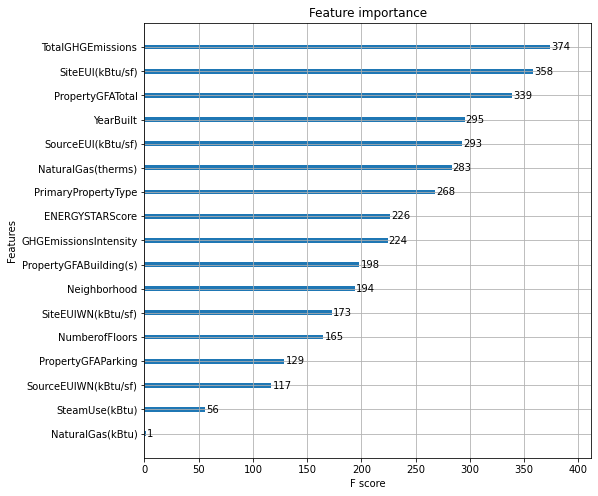

In [68]:
xgb.plot_importance(xg_reg1)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()